<a href="https://colab.research.google.com/github/Priyo-prog/Generative-AI-Lessons/blob/main/DCGANs/DCGAN_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Practice - 1**

## Import the Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

## Loading And Preprocessing The Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## Visualize a Random Data

0


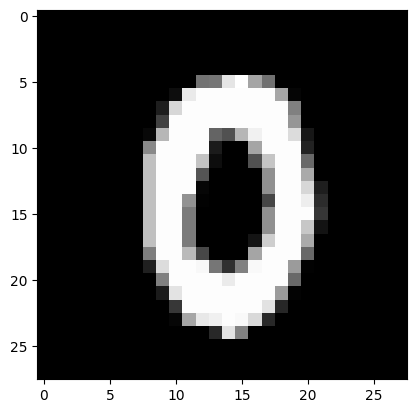

In [3]:
i = np.random.randint(0,60000)

print(y_train[i])
plt.imshow(X_train[i],cmap="gray")

In [4]:
X_train.shape

(60000, 28, 28)

## Reshape The Data

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float16')

In [6]:
X_train.shape

(60000, 28, 28, 1)

## Normalize The Data

In [7]:
X_train = (X_train - 127.5) / 127.5

In [8]:
X_train[0].min(),X_train[0].max()

(-1.0, 1.0)

Determine Buffer Size and Batch  Size of The Data

In [9]:
buffer_size = 60000
batch_size = 256

In [10]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [11]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

## Building The Generator

In [16]:
def build_generator():
  network = tf.keras.Sequential()

  network.add(layers.Dense(units=7*7*256, use_bias=False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  #network.add(layers.Reshape((7,7,256))): Reshapes the output of the dense layer
  #from a 1D tensor of shape (77256) to a 3D tensor of shape (7, 7, 256).
  # This prepares the data for the subsequent convolutional layers.

  network.add(layers.Reshape((7,7,256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(filters=128, kernel_size=(5,5), padding="same", use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(filters=64, kernel_size=(5,5), padding="same", strides=(2,2), use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Conv2DTranspose(filters=1, kernel_size=(5,5), padding="same", strides=(2,2), use_bias=False, activation="tanh"))

  network.summary()

  return network

In [17]:
generator = build_generator()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_2 (Bat  (None, 12544)             50176     
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 7, 7, 128)         819200    
 anspose)                                                        
                                                                 
 batch_normalization_3 (Bat  (None, 7, 7, 128)        

## Test The Generator With Random Noise Image

In [18]:
noise = tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.46447134,  1.0292617 ,  0.92600065,  1.0226352 ,  0.76391894,
         0.9509073 , -0.8014465 ,  1.2801663 ,  0.8857221 , -0.52115524,
        -0.7051065 ,  1.8640157 , -0.14440057, -0.46008977,  0.6480824 ,
        -0.3482756 , -0.18024164,  0.48878962,  1.2585797 , -0.22612701,
         0.49968407,  1.653455  , -0.9170042 , -0.14137037, -0.7224001 ,
        -0.30445963, -0.14444415,  2.650984  ,  0.34839362,  0.88357204,
        -0.5611519 ,  2.0816896 , -0.2527998 , -0.31253186,  2.1192813 ,
         0.6258561 , -1.2568501 ,  0.06968567,  0.6089282 ,  0.74740833,
         1.084787  , -0.6437546 , -0.08976905,  0.35618237,  0.36809126,
         0.58808166,  0.18160178,  0.81246334, -0.2590034 ,  0.3694067 ,
        -0.01377751,  0.50044054,  2.229927  ,  0.274391  , -0.51334125,
        -1.6772693 , -0.86035615,  1.3033837 , -0.09368783,  1.6420176 ,
         1.0829303 ,  0.4214911 ,  0.30254796, -0.6066646 ,  0.11654957,
 

In [19]:
generated_image = generator(noise, training=False)

In [21]:
generated_image.shape

TensorShape([1, 28, 28, 1])

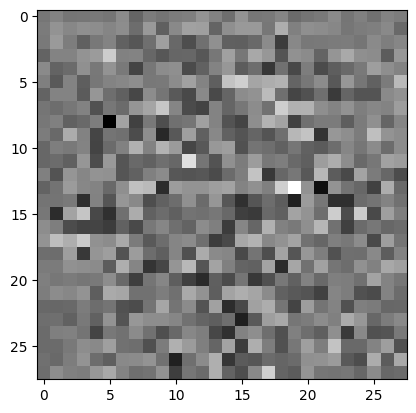

In [23]:
# show the image
plt.imshow(generated_image[0,:,:,0], cmap='gray')

## Build The Discriminator

In [26]:
def build_discriminator():
  network = tf.keras.Sequential()

  #14x14x64
  network.add(layers.Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), padding="same", input_shape=[28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  #7x7x128
  network.add(layers.Conv2D(filters=128, kernel_size=(5,5), strides=(2,2), padding="same"))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()

  return network

## Test the Discriminator With The generated Image

In [27]:
discriminator = build_discriminator()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [29]:
discriminator(generated_image, training=False) # logits

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00180127]], dtype=float32)>

In [30]:
tf.sigmoid(discriminator(generated_image, training=False)).numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.4995497]], dtype=float32)>>

## Error Calculation

In [31]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [32]:
tf.ones_like(discriminator(generated_image, training=False))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>